In [1]:
import os
import numpy as np
from base import *

In [2]:
pth = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\lung tissue data delete 10x'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'test')
pthtestim = os.path.join(pthtest, '10x')
resolution = '10x'
nm = '10xashleytest'


WS = [[0, 2, 0, 0, 0, 2, 0], [6, 7], 
      [1, 2, 3, 4, 5, 6, 7], 
      [7, 2, 5, 4, 3, 1, 6], [5]]


numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[170, 170, 255],
                   [  0,  85, 127],
                   [170,   0,   0],
                   [170, 170, 127],
                   [255, 0, 255],
                   [255, 255, 255],
                   [255, 170, 255]])

classNames = ['bronchioles', 'alveoli', 'vasculature', 'mets', 'nonexpanded','whitespace','collagen']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
['bronchioles', 'alveoli', 'vasculature', 'mets', 'nonexpanded', 'whitespace', 'collagen']
['bronchioles', 'alveoli', 'vasculature', 'mets', 'whitespace', 'collagen']
[[170 170 255]
 [  0  85 127]
 [170   0   0]
 [170 170 127]
 [255 255 255]
 [255 170 255]]
Max WS[2]: 6
Classnames: ['bronchioles', 'alveoli', 'vasculature', 'mets', 'whitespace', 'collagen']
Creating Net metadata file...


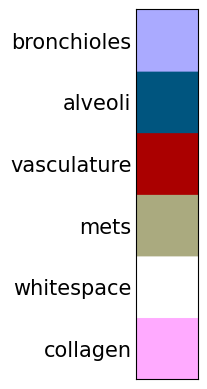

In [3]:
save_model_metadata_GUI(pthDL, pthim,pthtest, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate, nTA = 3,final_df = None, combined_df = None, model_type="DeepLabV3_plus", batch_size=3)

In [4]:
WSI2tif(pth, resolution, umpix)

1 / 4 processing: TVNTC 1-2 2
2 / 4 processing: 84 - 2024-02-26 10.33.40
3 / 4 processing: TVWT 4-1 1
4 / 4 processing: 2024-02-26 10.36.39


In [5]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
Image 1 of 4: 84 - 2024-02-26 10.33.40
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.8764266967773438 seconds
 Creating file...
  Calculating TA image
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding box tiles of all annotations
 Finished image in 125 seconds.
Image 2 of 4: 2024-02-26 10.36.39
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.5638673305511475 seconds
 Creating file...
  Calculating TA image
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding box tiles of all annotations
 Finished image in 71 seconds.
Image 3 of 4: TVWT 4-1 1
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.845231294631958 seconds
 Creating file...
  Calculating TA image
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding b

In [6]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 99878500.0 pixels of bronchioles, 7% of the most common class.
 There are 486783700.0 pixels of alveoli, 35% of the most common class.
 There are 72843800.0 pixels of vasculature, 5% of the most common class.
 There are 126566400.0 pixels of mets, 9% of the most common class.
 There are 1360772200.0 pixels of whitespace. This is the most common class.
 There are 69696300.0 pixels of collagen, 5% of the most common class.

Building training tiles...
Total time elapsed for the while loop: 301.9463093280792
Saving big tiles
  1 of 15 training images completed in 5 minutes
  Used 281.5% counts and 58.5% unique annotations of bronchioles
  Used 382.1% counts and 63.1% unique annotations of alveoli
  Used 169.6% counts and 58.2% unique annotations of vasculature
  Used 289.3% counts and 71.4% unique annotations of mets
  Used 323.8% counts and 60.5% unique annotations of whitespace
  Used 187.0% counts and 62.3% unique

TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Starting model training...
Epoch 1/8
500/500 [==============================] - 202s 379ms/step - loss: 0.1206 - accuracy: 0.9593 - val_loss: 0.0928 - val_accuracy: 0.9673
Epoch 2/8
500/500 [==============================] - 187s 373ms/step - loss: 0.0537 - accuracy: 0.9805 - val_loss: 0.0801 - val_accuracy: 0.9743
Epoch 3/8
500/500 [==============================] - 189s 378ms/step - loss: 0.0331 - accuracy: 0.9873 - val_loss: 0.0434 - val_accuracy: 0.9837
Epoch 4/8
500/500 [==============================] - 187s 374ms/step - loss: 0.0271 - accuracy: 0.9894 - val_loss: 0.0368 - val_accuracy: 0.9864
Epoch 5/8
500/500 [==============================] - 185s 369ms/step - loss: 0.0235 - accuracy: 0.9907 - val_loss: 0.2144 - val_accuracy: 0.9420
Epoch 6/8
500/500 [==============================] - 187s 374ms/step - loss: 0.0212 - accuracy: 0.9915 - val_loss: 0.0395 - val_accuracy: 0.9862
Epoch 7/8

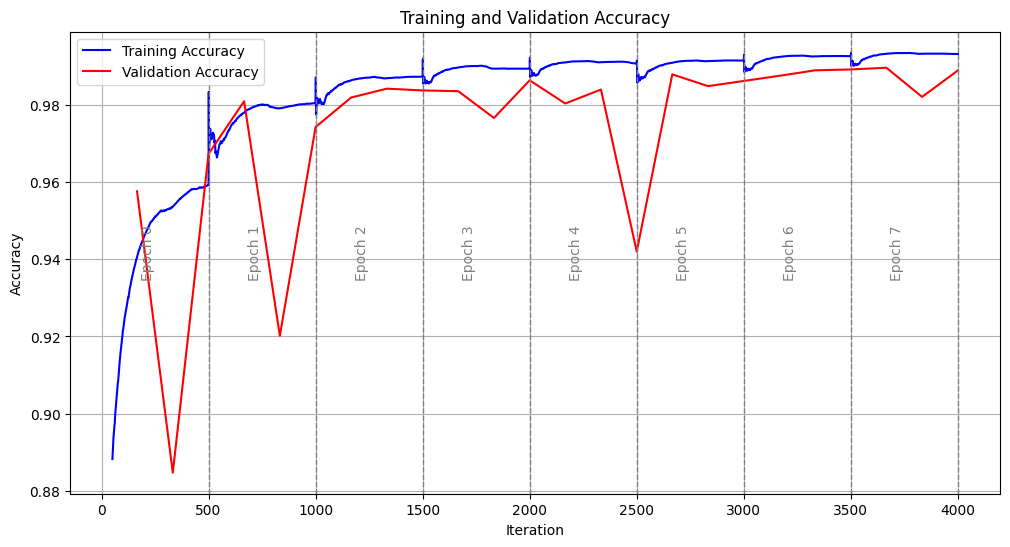

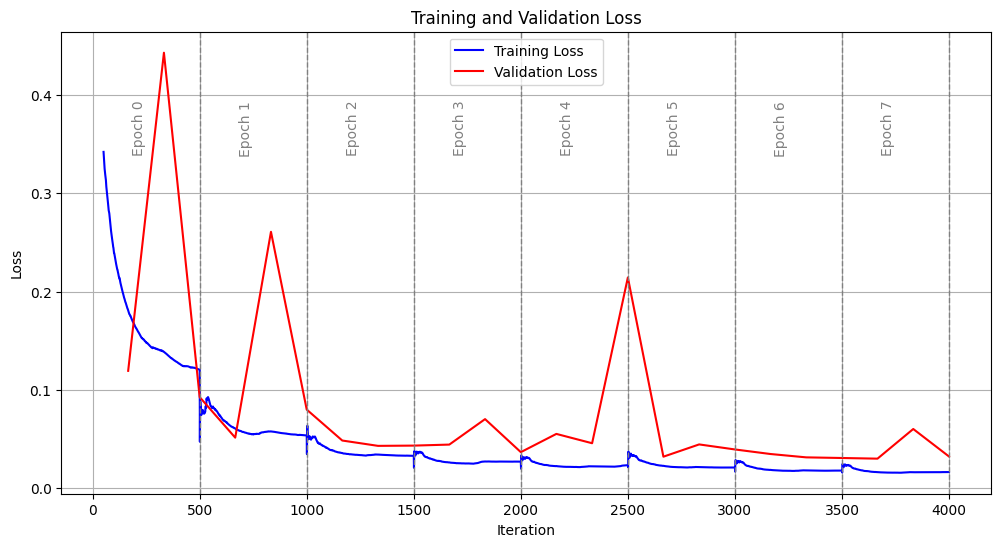

In [7]:
train_segmentation_model_cnns(pthDL)

1 / 1 processing: TVWT 2-2 2
Testing segmentation model......
 
Importing annotation data...
Image 1 of 1: TVWT 2-2 2
 1. of 4. Importing annotation data from xml file
Loading annotation took 0.0 minutes and 0.40650343894958496 seconds
 Creating file...
  Calculating TA image
 2. of 4. Interpolating annotated regions and saving mask image
 4. of 4. Creating bounding box tiles of all annotations
 Finished image in 69 seconds.
   
  Starting classification of image 1 of 1: TVWT 2-2 2.tif
Image 1 of 1 took 49 s
  Total time for classification: 0.0h 1.0m 22.945457696914673s


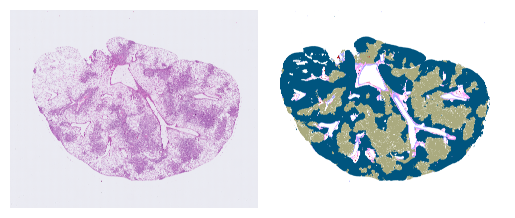


Calculating total number of pixels in the testing dataset...
  There are 165012 pixels of bronchioles, 21% of the most common class.
  There are 315017 pixels of alveoli, 41% of the most common class.
  There are 124032 pixels of vasculature, 16% of the most common class.
  There are 484999 pixels of mets, 63% of the most common class.
  There are 761013 pixels of whitespace. This is the most common class.
  There are 33727 pixels of collagen, 4% of the most common class.


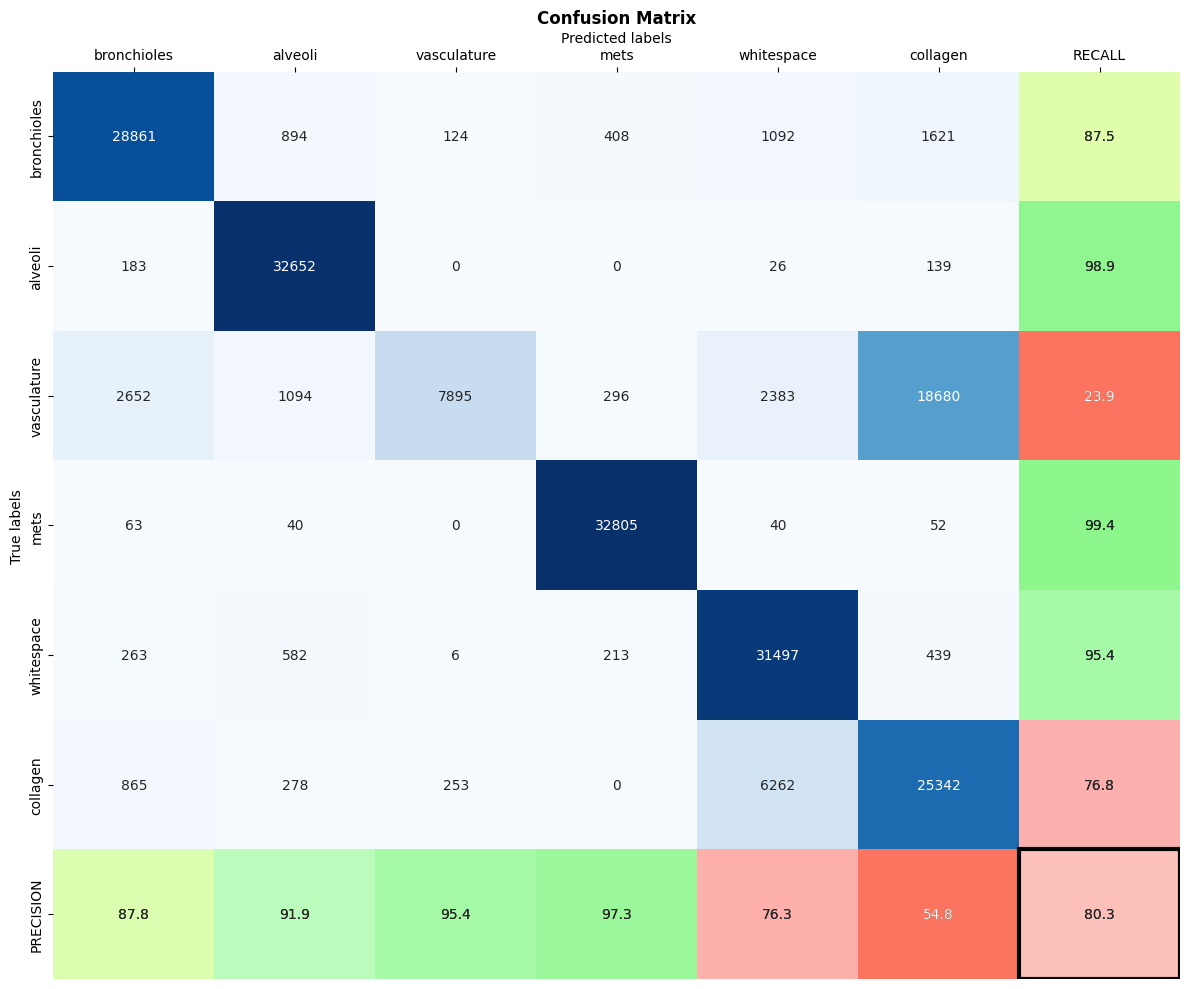


Confusion matrix saved to \\10.99.134.183\kiemen-lab-data\Valentina Matos\lung tissue data delete 10x\10xashleytest\confusion_matrixDeepLabV3_plus.jpg

Overall Accuracy: 80.3%


In [9]:
WSI2tif(pthtest, resolution, umpix)
test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name = "DeepLabV3_plus")

   
  Starting classification of image 1 of 4: 2024-02-26 10.36.39.tif
Image 1 of 4 took 56 s
  Starting classification of image 2 of 4: 84 - 2024-02-26 10.33.40.tif
Image 2 of 4 took 100 s
  Starting classification of image 3 of 4: TVNTC 1-2 2.tif
Image 3 of 4 took 50 s
  Starting classification of image 4 of 4: TVWT 4-1 1.tif
Image 4 of 4 took 87 s
  Total time for classification: 0.0h 7.0m 11.70482850074768s


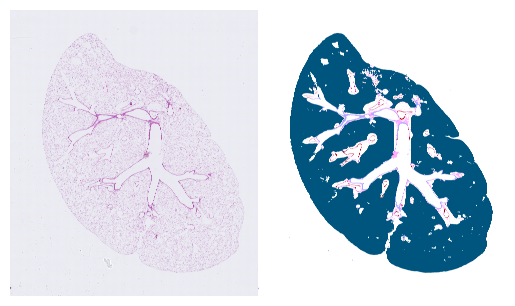

'\\\\10.99.134.183\\kiemen-lab-data\\Valentina Matos\\lung tissue data delete 10x\\10x\\classification_10xashleytest_DeepLabV3_plus'

In [10]:
classify_images(pthim,pthDL, name = "DeepLabV3_plus")